In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'NanumGothic'
import warnings 
warnings.filterwarnings('ignore')

In C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in M

In [2]:
df_may = pd.read_csv("data_may.csv")
df_june = pd.read_csv("data_june.csv")
df_july = pd.read_csv("data_july.csv")
df_aug = pd.read_csv("data_aug.csv")

In [3]:
def drop_error_data(df):
    drop_inds = []

    # 1. 재난지원금 이용횟수가 총 이용횟수보다 더 많은 경우
    drop_inds+=df[df['NumofDisSpent']>df['NumofSpent']].index.tolist()

    # 2. 총 이용건수가 0임에도 총 사용금액이나 재난지원금 사용금액이 0이 아닌 경우
    drop_inds+=df[(df['NumofSpent']==0)&((df['TotalSpent']!=0) | (df['DisSpent']!=0) )].index.tolist()

    # 3. 재난 이용건수가 0임에도 재난지원금 사용금액이 0이 아닌 경우
    drop_inds +=df[(df['NumofDisSpent']==0)&(df['DisSpent']!=0)].index.tolist()

    # 4. 총 이용건수와 재난지원금 이용건수가 같으나 총 소비액과 재난지원금 소비액이 다른 경우
    drop_inds += df[(df['NumofDisSpent']==df['NumofSpent']) & (df['TotalSpent']!=df['DisSpent'])].index.tolist()
    
    #5. 중복된 데이터를 제거
    #df.duplicated(['key1'], keep='first')

#출처: https://rfriend.tistory.com/266 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]
   # df_dupl_market = df_dupl_market.drop_duplicates(keep='first')
    return drop_inds

In [4]:
# drop할 index들
may_drop_idx = drop_error_data(df_may)
june_drop_idx = drop_error_data(df_june)
july_drop_idx = drop_error_data(df_july)
aug_drop_idx = drop_error_data(df_aug)

In [5]:
df_may = df_may.drop(may_drop_idx)
df_june = df_june.drop(june_drop_idx)
df_july = df_july.drop(july_drop_idx)
df_aug = df_aug.drop(aug_drop_idx)


재난지원금 사용범위

- 주민등록 기준 지역에서 사용 가능(따라서 제주도민만의 재난지원금임)

재난지원금 지급시기

- 4월

Type의 종류가 매우 많기 때문에 이를 분류해줄 필요가 있습니다

## 월별 소비량 파악 

In [6]:
total_may = df_may['TotalSpent'].sum()
total_june = df_june['TotalSpent'].sum()
total_july = df_july['TotalSpent'].sum()
total_aug = df_aug['TotalSpent'].sum()
total_dis_may = df_may['DisSpent'].sum()
total_dis_june = df_june['DisSpent'].sum()
total_dis_july = df_july['DisSpent'].sum()
total_dis_aug = df_aug['DisSpent'].sum()

In [7]:
month_total = [total_may, total_june, total_july, total_aug]
month_dis_total = [total_dis_may, total_dis_june, total_dis_july, total_dis_aug]
month = ["May", "June", "July", "August"]

In [8]:
df_month_spent = pd.DataFrame({'month_total' : month_total, 'month_dis_total' : month_dis_total, 'month' : month})

Text(0.5, 1.0, '제주도 각 월별 총 재난지원금 사용금액')

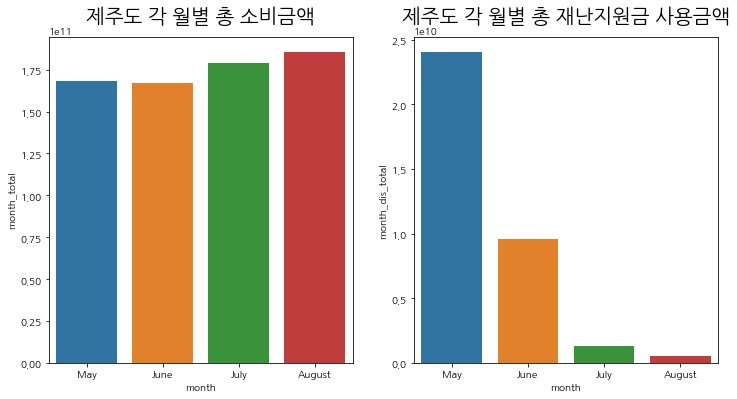

In [9]:
f, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.barplot(x = 'month', y = 'month_total', data = df_month_spent, ax = ax[0])
ax[0].set_title("제주도 각 월별 총 소비금액", fontsize = 20, pad = 15)
sns.barplot(x = 'month', y = 'month_dis_total', data = df_month_spent, ax = ax[1])
ax[1].set_title("제주도 각 월별 총 재난지원금 사용금액", fontsize = 20, pad = 15)

## 월별로 업종별 소비패턴파악

In [10]:
df_may['Type'].unique()

array(['일반한식', '단란주점', '편의점', '주점', '스넥', '서양음식', '일식회집', '기타음료식품', '노래방',
       '중국음식', '슈퍼마켓', '유흥주점', '기타숙박업', '기타레져업', '당구장', '농축수산품', '유아원',
       '골프경기장', '세탁소', '가방', '콘도', '주차장', '문화취미기타', '주유소', '사무서비스',
       '자동차정비', '특급호텔', '볼링장', '화장품', '기타회원제형태업소', '주류판매점', '제과점',
       '피부미용실', '약국', '칵테일바', '독서실', '스포츠레져용품', '골프용품', 'LPG', '종합병원',
       '사우나', '정육점', '화원', '의원', '안마스포츠마사지', '골프연습장', '2급호텔', '기타대인서비스',
       '보습학원', '부동산분양', '화물운송', '애완동물', '동물병원', '대형할인점', '인터넷Mall', '항공사',
       '헬스크럽', '기타유통업', '레져용품수리', '정장', '레져업소(회원제형태)', '관광여행', '1급호텔',
       '침구수예점', '사진관', '악세사리', '보관창고업', '기념품점', '미용원', '영화관', '의료용품',
       '세차장', '인터넷종합Mall', '기타잡화', '성인용품점', '상품권', '종합용역', '기계공구',
       '조세서비스', '택시', '기타의료기관및기기', '가례서비스', '구내매점', '수영장', '목재석재철물',
       '건축요업품', '기타업종', '렌트카', '종합레져타운', '유류판매', '농축협직영매장', '기타건축자재',
       '비료농약사료종자', '농기계', '보일러펌프', '가전제품', '스포츠의류', '페인트', '미곡상',
       '기타농업관련', '기타가구', '공공요금', '기능학원', '면세점', '기타교육', '위탁급식업', '이용원',
       '조명기구',

업종에 대한 대분류 만들어서 원래 데이터프레임에 붙이기 

In [11]:
middle_catgory = pd.read_csv("middle_category.csv") #행정안전부 안내 사용처 기반으로 세부 업종을 중분류 업종

In [12]:
middle_catgory.head()

,세부업종,중분류
0,1급호텔,여가/레저/숙박
1,2급호텔,여가/레저/숙박
2,CATV,가전/디지털/통신
3,DVD음반테이프판매,문구/서점
4,LPG,주유


In [13]:
middle_catgory = middle_catgory.rename(columns = {"세부업종" : "Type", "중분류" : "mid_Type"})

In [14]:
df_may = pd.merge(df_may, middle_catgory, on = ["Type"], how = "left")

In [15]:
df_june = pd.merge(df_june, middle_catgory, on = ["Type"], how = "left")
df_july = pd.merge(df_july, middle_catgory, on = ["Type"], how = "left")
df_aug = pd.merge(df_aug, middle_catgory, on = ["Type"], how = "left")

In [16]:
Type_may_spent = df_may.groupby('mid_Type')[['TotalSpent', 'DisSpent']].sum().reset_index()
Type_june_spent = df_june.groupby('mid_Type')[['TotalSpent', 'DisSpent']].sum().reset_index()
Type_july_spent = df_july.groupby('mid_Type')[['TotalSpent', 'DisSpent']].sum().reset_index()
Type_aug_spent = df_aug.groupby('mid_Type')[['TotalSpent', 'DisSpent']].sum().reset_index()

In [17]:
Type_may_spent['month'] = "May"
Type_june_spent['month'] = "June"
Type_july_spent['month'] = "July"
Type_aug_spent['month'] = "Auguest"

In [18]:
Type_month_spent = pd.concat([Type_may_spent, Type_june_spent, Type_july_spent, Type_aug_spent], axis = 0)

Text(0.5, 1.0, '제주도 월별 각 산업별 총 소비금액')

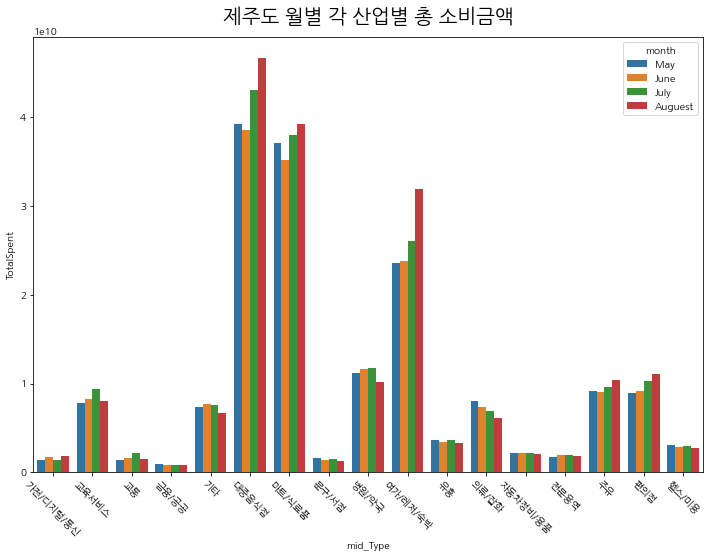

In [19]:
plt.figure(figsize = (12, 8))
plt.xticks(rotation = - 45 )
p = sns.barplot(x = 'mid_Type', y = 'TotalSpent', hue = 'month', data = Type_month_spent)
p.set_title("제주도 월별 각 산업별 총 소비금액", fontsize = 20, pad = 15)

- 여가 레저 숙박이 늘어난 것을 보면 휴가철로 인한 소비의 증가라고 볼 수 있다

Text(0.5, 1.0, '제주도 월별 각 산업별 총 재난지원금 사용금액')

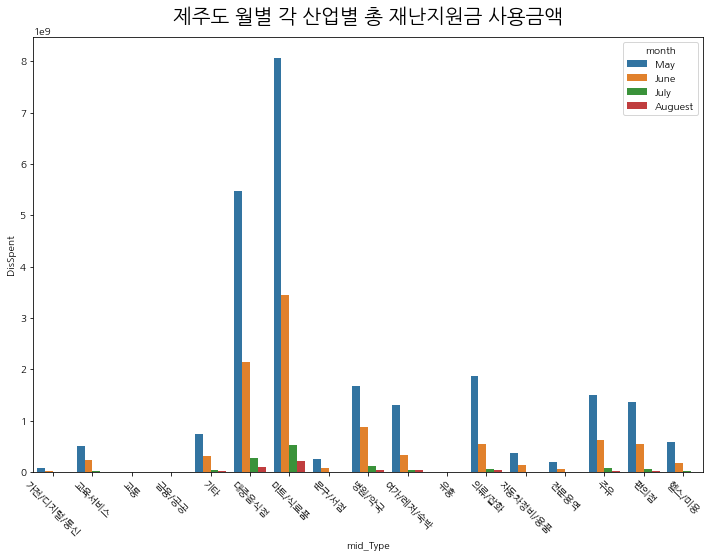

In [20]:
plt.figure(figsize = (12, 8))
plt.xticks(rotation = - 45 )
p = sns.barplot(x = 'mid_Type', y = 'DisSpent', hue = 'month', data = Type_month_spent)
p.set_title("제주도 월별 각 산업별 총 재난지원금 사용금액", fontsize = 20, pad = 15)

- 마트, 식료품에 많은 재난지원금이 사용이 되었으며, 대중음식점에도 많이 사용되었다
- 재난지원금의 사용현황을 보기 위해선 5월 6월이 적당해보인다(거의 대부분 소비)

## 재난 지원금은 일상 소비를 대체한 것인가?(일상 소비라는 것을 어떻게 정의할 것인가?)

전체소비에 비해 재난 지원금의 비율을 통해 일상 소비를 대체한 것인지 아니면 재난지원금을 통해 다른 소비가 일어났는지 확인

In [21]:
# 총소비금액에 비해 재난지원금 사용비율
Type_month_spent['dis_per_total'] = Type_month_spent['DisSpent'] / Type_month_spent['TotalSpent']

### 업종 별 재난지원금의 총사용 분포와 총소비에서 재난지원금이 차지하는 비율

Text(0.5, 1.0, '제주도 각 산업의 총소비금액 대비 재난지원금 사용비율 사용금액')

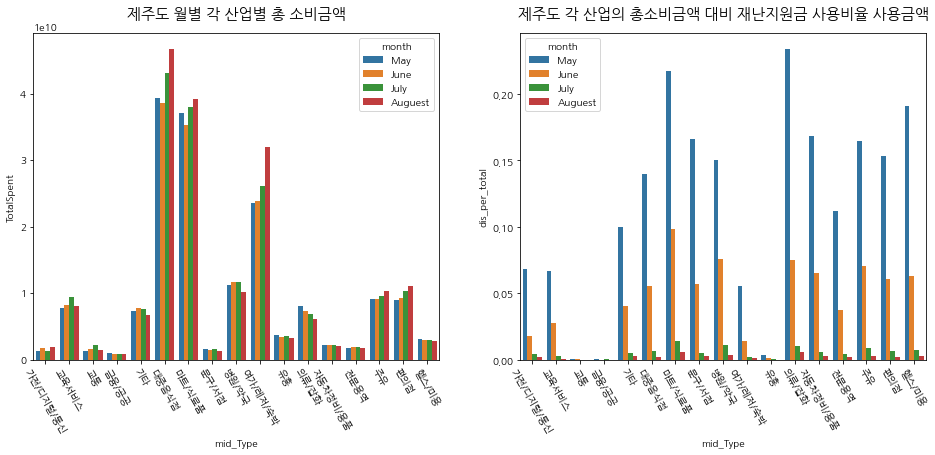

In [22]:
plt.figure(figsize = (16, 6))
ax = plt.subplot(1, 2, 1)
plt.xticks(rotation = - 60)
p = sns.barplot(x = 'mid_Type', y = 'TotalSpent', hue = 'month', data = Type_month_spent, ax = ax)
p.set_title("제주도 월별 각 산업별 총 소비금액", fontsize = 15, pad = 15)
ax = plt.subplot(1, 2, 2)
plt.xticks(rotation = - 60)
p = sns.barplot(x = 'mid_Type', y = 'dis_per_total', hue = 'month', data = Type_month_spent, ax = ax)
p.set_title("제주도 각 산업의 총소비금액 대비 재난지원금 사용비율 사용금액", fontsize = 15, pad = 15)

### 어떤 업종이 재난지원금을 통해 보다 소비진작이 되었을까?

1. 가설 : 5월이 다른 월보다 더 많은 소비를 보이는 업종이 재난지원금을 통해 소비진작이 된 업종일 것이다.

In [23]:
may_to_aug = Type_month_spent[Type_month_spent['month'] == "May"]['mid_Type'][Type_month_spent[Type_month_spent['month'] == "May"]['TotalSpent'] - Type_month_spent[Type_month_spent['month'] == "Auguest"]['TotalSpent'] > 0].reset_index().drop(['index'], axis = 1)
may_to_july = Type_month_spent[Type_month_spent['month'] == "May"]['mid_Type'][Type_month_spent[Type_month_spent['month'] == "May"]['TotalSpent'] - Type_month_spent[Type_month_spent['month'] == "July"]['TotalSpent'] > 0].reset_index().drop(['index'], axis = 1)
may_to_june = Type_month_spent[Type_month_spent['month'] == "May"]['mid_Type'][Type_month_spent[Type_month_spent['month'] == "May"]['TotalSpent'] - Type_month_spent[Type_month_spent['month'] == "June"]['TotalSpent'] > 0].reset_index().drop(['index'], axis = 1)

In [24]:
affect_dis_midtype = pd.DataFrame({"mid_Type" : list(set(may_to_aug['mid_Type']) & set(may_to_july['mid_Type']) & set(may_to_june['mid_Type']))})

In [25]:
Type_month_spent[(Type_month_spent['mid_Type'].isin(affect_dis_midtype['mid_Type'])) & (Type_month_spent['month'] == 'May')].sort_values(by = 'dis_per_total', ascending = False)

,mid_Type,TotalSpent,DisSpent,month,dis_per_total
11,의류/잡화,8044416238,1880323933,May,0.233743
16,헬스/미용,3051348448,581782625,May,0.190664
12,자동차정비/용품,2211636974,372200173,May,0.168292
7,문구/서점,1591534218,264624743,May,0.166270
10,유흥,3623950813,12734980,May,0.003514
3,금융/공공,976213830,475270,May,0.000487


우선 전체 소비의 15프로 이상이 재난지원금이 차지하는 의류잡화, 헬스/미용, 자동차정비, 문구/서점이 재난지원금을 통해 혜택을 본 업종이라고 생각해 볼 수 있다.

질문 유흥, 금융/공공은 왜 5월이 가장 높을까?

## 지역별 재난지원금이 골고루 사용이 되었을까?

In [26]:
import geopandas as gpd

## geopandas 및 좌표를 통해 인구수 결합

In [27]:
#각 읍면동 마다 구역이 polygon으로 나누어져 있고, 제주시, 서귀포시 인구수를 가지고 있는 데이터
jejusi_pop = gpd.read_file("제주시 읍면동 인구/nlsp_003001001.shp")
seogipo_pop = gpd.read_file("서귀포시 읍면동 인구/nlsp_003001001.shp")

In [28]:
#제주시와 서귀포시에 각각 월평동이 존재하므로 이를 구분하기 위해 시도라는 컬럼생성
jejusi_pop['SIGUNGU'] = "제주시"
seogipo_pop['SIGUNGU'] = "서귀포시"

In [29]:
#행정구역과 ID, polygon으로 구역을 표시해주는 공간데이터
#행정구역마다 EMD_CD라는 unique한 ID를 가지고 있음
jeju_name = gpd.read_file("제주도행정구역/LSMD_ADM_SECT_UMD_50.shp", encoding = 'euc-kr') 

In [30]:
jeju_name = jeju_name.rename(columns = {"EMD_CD" : "key", "EMD_NM" : "읍면동"})
#jeju_name[jeju_name['읍면동'] == "월평동"]
jeju_name = jeju_name[["key", "읍면동"]]

In [31]:
gdf_jeju_pop = pd.concat([jejusi_pop, seogipo_pop])
gdf_jeju_pop = gdf_jeju_pop.drop(['lbl'], axis = 1)
gdf_jeju_pop = gdf_jeju_pop.rename(columns = {'val' : 'total_pop', 'gid' : 'key'})

In [32]:
gdf_jeju_pop = pd.merge(gdf_jeju_pop, jeju_name, on = "key", how = "left")

In [33]:
gdf_jeju_pop[gdf_jeju_pop['읍면동'] == "대정읍"]

,key,total_pop,geometry,SIGUNGU,읍면동
72,50130250,21647.0,"MULTIPOLYGON (((881168.350 1472982.219, 881161...",서귀포시,대정읍


In [34]:
gdf_jeju_pop.isnull().sum()

key          0
total_pop    0
geometry     0
SIGUNGU      0
읍면동          0
dtype: int64

In [35]:
df_may['읍면동'] = df_may['address'].apply(lambda x : x.split()[2])
df_june['읍면동'] = df_june['address'].apply(lambda x : x.split()[2])
df_july['읍면동'] = df_july['address'].apply(lambda x : x.split()[2])
df_aug['읍면동'] = df_aug['address'].apply(lambda x : x.split()[2])

In [36]:
print(len(gdf_jeju_pop['읍면동']))
df_may['읍면동'].nunique()

74


73

In [37]:
set(df_may['읍면동'].unique()) - set(gdf_jeju_pop['읍면동'].unique())

set()

국토정보맵에서 제공하는 읍면동별 데이터가 kosis보다 데이터 분석하는데 좀 더 알맞는 데이터를 제공한다.

In [38]:
#5월 6월 소비데이터 + 각 읍면동 인구수 결합
df_may = pd.merge(df_may, gdf_jeju_pop[['total_pop', '읍면동','SIGUNGU']], on = ["읍면동","SIGUNGU"], how = 'left')
df_june= pd.merge(df_june, gdf_jeju_pop[['total_pop', '읍면동', 'SIGUNGU']], on = ["읍면동", "SIGUNGU"], how = 'left')

In [39]:
df_may['total_pop'].isnull().sum()

20

In [40]:
df_june['total_pop'].isnull().sum()

31

5월, 6월 인구수에 결측치가 발생한 것을 볼 수 있다.

In [41]:
df_may[df_may['total_pop'].isnull()].head()

,Unnamed: 0,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,...,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lat,long,address,mid_Type,읍면동,total_pop
55035,55149,55150,55150,202005,제주특별자치도,제주시,영세,일반한식,11시,860000,...,40,4,878508.1253,1.479174e+06,33.297142,126.195104,제주특별자치도 서귀포시 대정읍 신도리,대중음식점,대정읍,NaN
72590,72752,72753,72753,202005,제주특별자치도,제주시,영세,일식회집,12시,468000,...,10,2,878407.9347,1.479223e+06,33.297577,126.194022,제주특별자치도 서귀포시 대정읍 신도리,대중음식점,대정읍,NaN
72592,72754,72755,72755,202005,제주특별자치도,제주시,영세,일반한식,12시,970000,...,39,7,878508.1253,1.479174e+06,33.297142,126.195104,제주특별자치도 서귀포시 대정읍 신도리,대중음식점,대정읍,NaN
91563,91782,91783,91783,202005,제주특별자치도,제주시,영세,일식회집,13시,195000,...,6,1,878407.9347,1.479223e+06,33.297577,126.194022,제주특별자치도 서귀포시 대정읍 신도리,대중음식점,대정읍,NaN
91565,91784,91785,91785,202005,제주특별자치도,제주시,영세,일반한식,13시,963000,...,44,12,878508.1253,1.479174e+06,33.297142,126.195104,제주특별자치도 서귀포시 대정읍 신도리,대중음식점,대정읍,NaN


In [42]:
df_june[df_june['total_pop'].isnull()].head()

,Unnamed: 0,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,...,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lat,long,address,mid_Type,읍면동,total_pop
23702,23758,23759,23759,202006,제주특별자치도,제주시,일반,기타농업관련,08시,300000,...,1,0,880311.0804,1.478383e+06,33.290211,126.214570,제주특별자치도 서귀포시 대정읍 신도리,기타,대정읍,NaN
30614,30724,30725,30725,202006,제주특별자치도,제주시,영세,일식회집,09시,4000,...,1,0,878407.9347,1.479223e+06,33.297577,126.194022,제주특별자치도 서귀포시 대정읍 신도리,대중음식점,대정읍,NaN
30630,30740,30741,30741,202006,제주특별자치도,제주시,일반,기타농업관련,09시,320000,...,1,0,880311.0804,1.478383e+06,33.290211,126.214570,제주특별자치도 서귀포시 대정읍 신도리,기타,대정읍,NaN
41014,41231,41232,41232,202006,제주특별자치도,제주시,영세,일식회집,10시,12000,...,1,0,878407.9347,1.479223e+06,33.297577,126.194022,제주특별자치도 서귀포시 대정읍 신도리,대중음식점,대정읍,NaN
55006,55360,55361,55361,202006,제주특별자치도,제주시,영세,일식회집,11시,354000,...,1,0,878407.9347,1.479223e+06,33.297577,126.194022,제주특별자치도 서귀포시 대정읍 신도리,대중음식점,대정읍,NaN


대정읍이 원래 서귀포시인데 제주시라고 잘못표기되어있어 다음과 같은 사태가 발생한 것을 알 수 있다.

In [43]:
#대정읍 SIGUNGU 서귀포시로 수정
df_may['SIGUNGU'].loc[df_may[df_may['읍면동'] == '대정읍'].index] = "서귀포시"
df_june['SIGUNGU'].loc[df_june[df_june['읍면동'] == '대정읍'].index] = "서귀포시"
df_july['SIGUNGU'].loc[df_july[df_july['읍면동'] == '대정읍'].index] = "서귀포시"
df_aug['SIGUNGU'].loc[df_aug[df_aug['읍면동'] == '대정읍'].index] = "서귀포시"




#total 인구에 대해서 drop후 다시 데이터 프레임 병합
df_may = df_may.drop(['total_pop'], axis = 1) 
df_june = df_june.drop(['total_pop'], axis = 1)

df_may = pd.merge(df_may, gdf_jeju_pop[['total_pop', '읍면동','SIGUNGU']], on = ["읍면동","SIGUNGU"], how = 'left')
df_june= pd.merge(df_june, gdf_jeju_pop[['total_pop', '읍면동', 'SIGUNGU']], on = ["읍면동", "SIGUNGU"], how = 'left')
df_july= pd.merge(df_july, gdf_jeju_pop[['total_pop', '읍면동', 'SIGUNGU']], on = ["읍면동", "SIGUNGU"], how = 'left')
df_aug= pd.merge(df_aug, gdf_jeju_pop[['total_pop', '읍면동', 'SIGUNGU']], on = ["읍면동", "SIGUNGU"], how = 'left')

#월평동 구분
df_may['읍면동'].loc[df_may[(df_may['읍면동'] == '월평동') & (df_may['SIGUNGU'] == '제주시')]['읍면동'].index] = "제주시 월평동"
df_may['읍면동'].loc[df_may[(df_may['읍면동'] == '월평동') & (df_may['SIGUNGU'] == '서귀포시')]['읍면동'].index] = "서귀포시 월평동"

df_june['읍면동'].loc[df_june[(df_june['읍면동'] == '월평동') & (df_june['SIGUNGU'] == '제주시')]['읍면동'].index] = "제주시 월평동"
df_june['읍면동'].loc[df_june[(df_june['읍면동'] == '월평동') & (df_june['SIGUNGU'] == '서귀포시')]['읍면동'].index] = "서귀포시 월평동"

df_july['읍면동'].loc[df_july[(df_july['읍면동'] == '월평동') & (df_july['SIGUNGU'] == '제주시')]['읍면동'].index] = "제주시 월평동"
df_july['읍면동'].loc[df_july[(df_july['읍면동'] == '월평동') & (df_july['SIGUNGU'] == '서귀포시')]['읍면동'].index] = "서귀포시 월평동"

df_aug['읍면동'].loc[df_aug[(df_june['읍면동'] == '월평동') & (df_aug['SIGUNGU'] == '제주시')]['읍면동'].index] = "제주시 월평동"
df_aug['읍면동'].loc[df_aug[(df_june['읍면동'] == '월평동') & (df_aug['SIGUNGU'] == '서귀포시')]['읍면동'].index] = "서귀포시 월평동"

## 읍면동 별 인구수

Text(0.5, 1.0, '읍면동별 인구수')

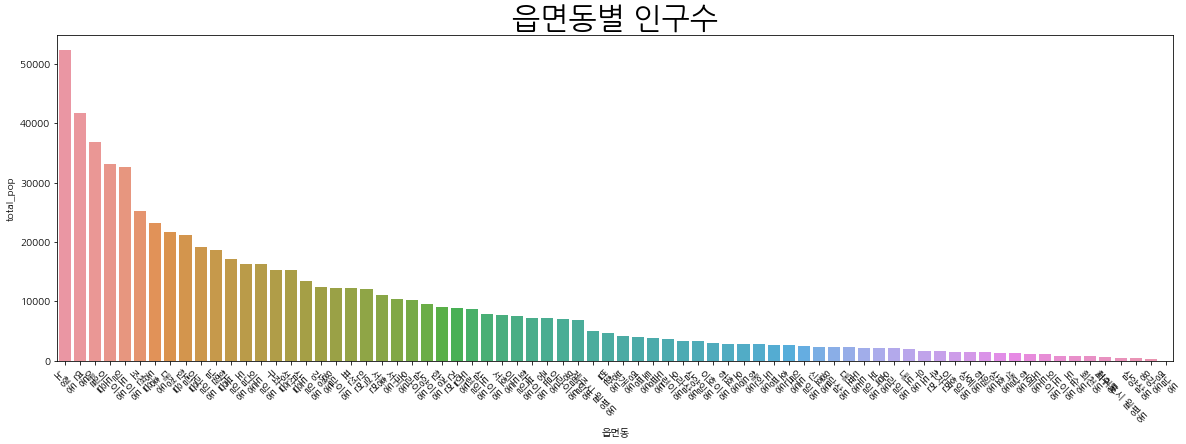

In [44]:
plt.figure(figsize = (20, 6))
plt.xticks(rotation = - 45 )
p = sns.barplot(x = '읍면동', y = 'total_pop', data = df_may.groupby('읍면동')['total_pop'].mean().reset_index().sort_values(by = 'total_pop', ascending = False))
p.set_title("읍면동별 인구수", fontsize=30)

### 5, 6월 읍면동 별 인구대비 총소비량, 재난지원금소비량

In [45]:
df_address_pop = df_may.groupby('읍면동')['total_pop'].mean()
df_address_totalspent = df_may.groupby('읍면동')['TotalSpent'].sum()
df_address_disspent = df_may.groupby('읍면동')['DisSpent'].sum()
df_comb_address = pd.merge(df_address_pop, df_address_totalspent, on = "읍면동", how = "inner")
df_comb_address = pd.merge(df_comb_address, df_address_disspent, on = "읍면동", how = "inner")
df_comb_address.head()

,total_pop,TotalSpent,DisSpent
읍면동,,,
강정동,12453.0,1866851200,299031499
건입동,8892.0,2375533345,369761103
구좌읍,15374.0,2755284266,259508342
남원읍,18600.0,2730595157,408256528
내도동,2047.0,235994389,44596115


In [46]:
df_address_pop6 = df_june.groupby('읍면동')['total_pop'].mean()
df_address_totalspent6 = df_june.groupby('읍면동')['TotalSpent'].sum()
df_address_disspent6 = df_june.groupby('읍면동')['DisSpent'].sum()
df_comb_address6 = pd.merge(df_address_pop6, df_address_totalspent6, on = "읍면동", how = "inner")
df_comb_address6 = pd.merge(df_comb_address6, df_address_disspent6, on = "읍면동", how = "inner")
df_comb_address6.head()

,total_pop,TotalSpent,DisSpent
읍면동,,,
강정동,12453.0,1883122730,134583103
건입동,8892.0,2239963536,136291862
구좌읍,15374.0,2916895566,118944824
남원읍,18600.0,2669534772,204882253
내도동,2047.0,226187610,17042948


In [47]:
df_comb_address.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 강정동 to 회천동
Data columns (total 3 columns):
total_pop     74 non-null float64
TotalSpent    74 non-null int64
DisSpent      74 non-null int64
dtypes: float64(1), int64(2)
memory usage: 2.3+ KB


Text(0.5, 1.0, '읍면동별 재난지원금 사용량')

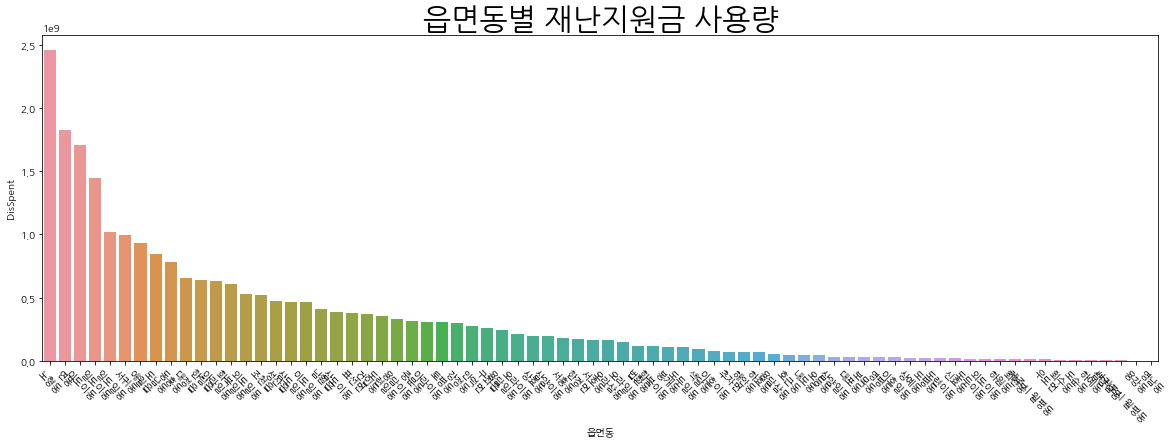

In [48]:
plt.figure(figsize = (20, 6))
plt.xticks(rotation = - 45 )
p = sns.barplot(x = '읍면동', y = 'DisSpent', data = df_comb_address['DisSpent'].reset_index().sort_values(by = 'DisSpent', ascending = False))
p.set_title("읍면동별 재난지원금 사용량", fontsize=30)

Text(0.5, 1.0, '5월 인구 대비 재난지원금 소비량')

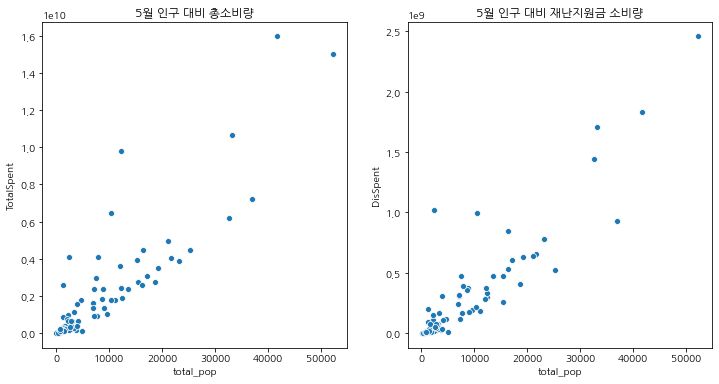

In [49]:
f, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.scatterplot(x = 'total_pop', y = 'TotalSpent', data = df_comb_address, ax = ax[0])
ax[0].set_title("5월 인구 대비 총소비량")
sns.scatterplot(x = 'total_pop', y = 'DisSpent', data = df_comb_address, ax = ax[1])
ax[1].set_title("5월 인구 대비 재난지원금 소비량")

Text(0.5, 1.0, '6월 인구 대비 재난지원금 소비량')

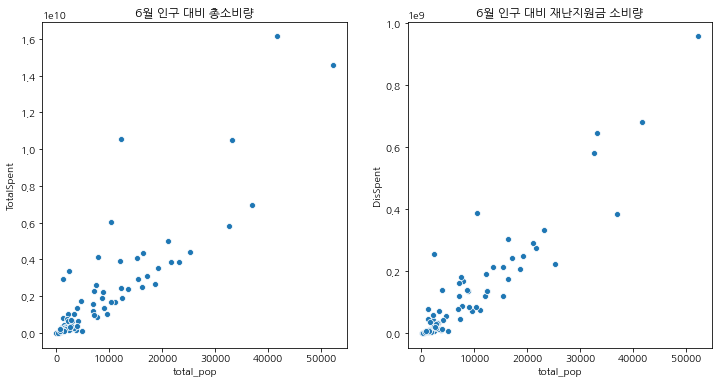

In [50]:
f, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.scatterplot(x = 'total_pop', y = 'TotalSpent',data = df_comb_address6, ax = ax[0])
ax[0].set_title("6월 인구 대비 총소비량")
sns.scatterplot(x = 'total_pop', y = 'DisSpent', data = df_comb_address6, ax = ax[1])
ax[1].set_title("6월 인구 대비 재난지원금 소비량")

- 동에 인구수가 많으면 총소비금액이나 재난지원금 소비금액이 대체적으로 선형관계를 갖음. but 안그러한 동도 있음을 알 수 있다.
- 인구수는 적으나 재난지원금이 많이 쓰인 동에 대해서 조사해볼 필요가 있어보인다
- 읍면동별 5월 6월의 총소비량과 재난지원금 개형 큰 차이는 없다

Text(0.5, 0, '')

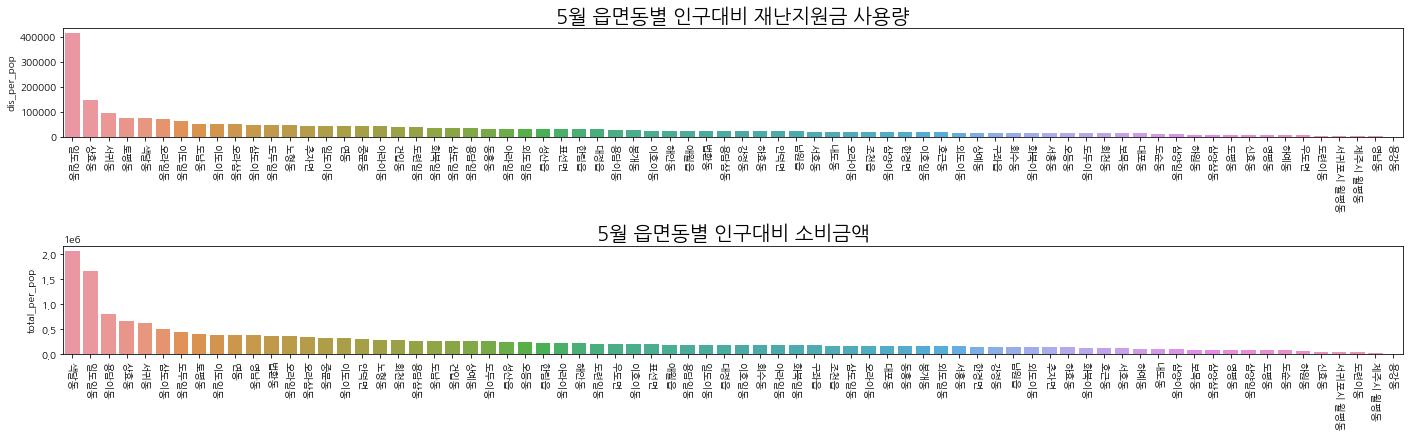

In [51]:
# 인구대비 재난지원금 소비량 
df_comb_address['dis_per_pop'] = df_comb_address['DisSpent'] / df_comb_address['total_pop']
df_comb_address['total_per_pop'] = df_comb_address['TotalSpent'] / df_comb_address['total_pop']
plt.figure(figsize = (24, 6))

ax = plt.subplot(2, 1, 1)
plt.xticks(rotation = - 90 )
sns.barplot(x = '읍면동', y = 'dis_per_pop', data = df_comb_address['dis_per_pop'].reset_index().sort_values(by = 'dis_per_pop', ascending = False), ax = ax)
ax.set_title("5월 읍면동별 인구대비 재난지원금 사용량", fontsize = 20)
ax.set_xlabel('')
#x_axis = ax.axes.get_xaxis()
#x_axis.set_visible(False)
plt.subplots_adjust(hspace = 1)


ax = plt.subplot(2, 1, 2)
plt.xticks(rotation = - 90 )
sns.barplot(x = '읍면동', y = 'total_per_pop', data = df_comb_address['total_per_pop'].reset_index().sort_values(by = 'total_per_pop', ascending = False), ax = ax)
ax.set_title("5월 읍면동별 인구대비 소비금액", fontsize = 20)
ax.set_xlabel('')
#ax.set_xticklabels([])
#x_axis = ax.axes.get_xaxis()
#x_axis.set_visible(False)

제주생활지원금은 4월에 1차, 6월에 2차로 나눠 지급된다. 5월에는 정부 차원에서 긴급재단지원금이 지급될 예정이다. 제주생활지원금은 전액 현금으로 지원되고 오는 20일 이후부터 순차적으로 1차 지원이 시작된다. 가구별 지원금액은 1차에서 1인 가구 20만원, 2인 가구 30만원, 3인 가구 40만원, 4인 가구 50만원이다. 2차까지 지원되면 4인 가구 기준으로 최대 100만원까지 지급된다.

Text(0.5, 0, '')

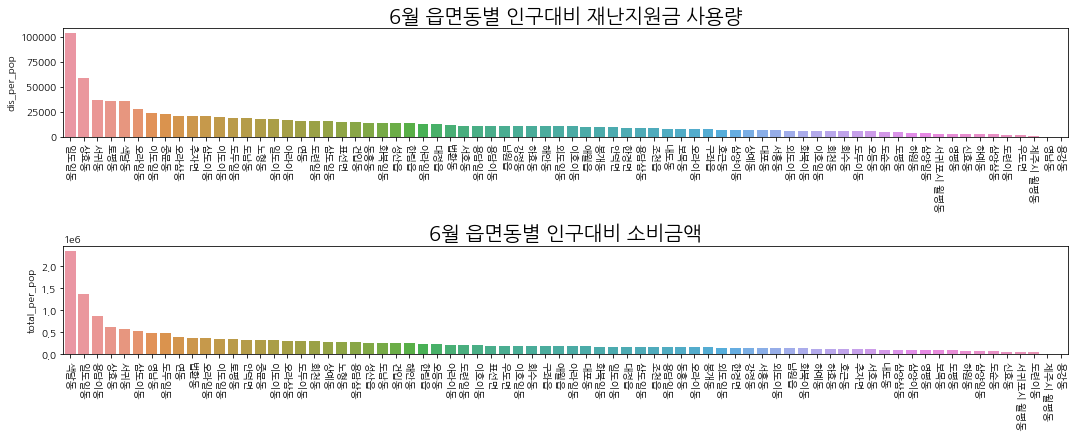

In [52]:
df_comb_address6['dis_per_pop'] = df_comb_address6['DisSpent'] / df_comb_address6['total_pop']
df_comb_address6['total_per_pop'] = df_comb_address6['TotalSpent'] / df_comb_address6['total_pop']
plt.figure(figsize = (18, 6))


ax = plt.subplot(2, 1, 1)
plt.xticks(rotation = - 90 )
sns.barplot(x = '읍면동', y = 'dis_per_pop', data = df_comb_address6['dis_per_pop'].reset_index().sort_values(by = 'dis_per_pop', ascending = False), ax = ax)
ax.set_title("6월 읍면동별 인구대비 재난지원금 사용량", fontsize = 20)
ax.set_xlabel('')

plt.subplots_adjust(hspace = 1)


ax = plt.subplot(2, 1, 2)
plt.xticks(rotation = - 90 )
sns.barplot(x = '읍면동', y = 'total_per_pop', data = df_comb_address6['total_per_pop'].reset_index().sort_values(by = 'total_per_pop', ascending = False), ax = ax)
ax.set_title("6월 읍면동별 인구대비 소비금액", fontsize = 20)
ax.set_xlabel('')




- 원래 일도일동이 인구대비 총 소비량도 많은 축에 속하나 일도일동이 인구대비 5월,6월 재난지원금의 사용이 독보적이게 많다 => 일도일동의 제주 소비의 메카
- 상호동, 서귀동, 토평동, 색달동에 대해 오라이동 이도일동에 대해 한번 살펴봐야겠다
- 5월 6월의 인구대비 읍별 재난지원금 사용차이는 없음을 알 수 있다.
- 그러나 인구대비 읍별 총 소비차이와 재난지원금 사용차이는 있다.
- **지역별 재난지원금의 사용분포가 고르지않고 차이가 있는 것으로 보인다**

## 재난금이 많이쓰인 지역 EDA

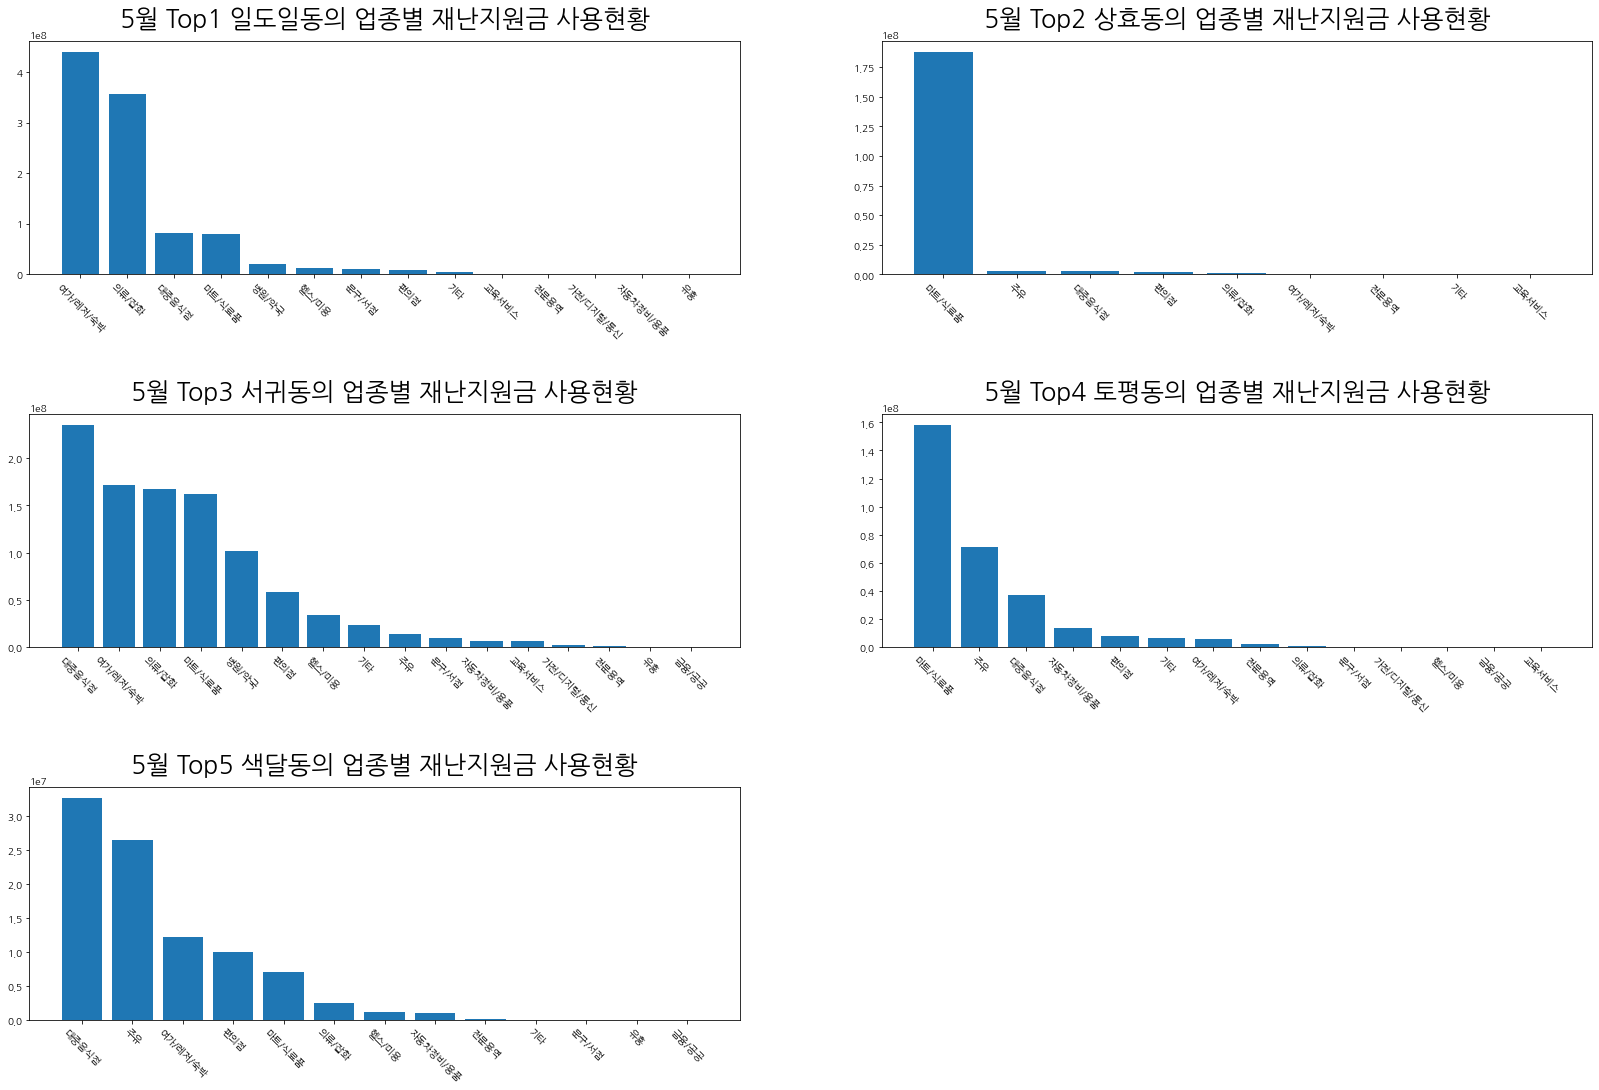

In [53]:
plt.figure(figsize = (28, 18))
df = df_comb_address['dis_per_pop'].reset_index().sort_values(by = 'dis_per_pop', ascending = False)
for idx, address in enumerate(df['읍면동']):
    if idx == 5:
        break
    ax = plt.subplot(3, 2, idx + 1)
    data = df_may[df_may['읍면동'] == address].groupby('mid_Type')['DisSpent'].sum().sort_values(ascending = False).reset_index()
    plt.xticks(rotation = - 45 )
    plt.subplots_adjust(hspace = .6)
    ax.bar(data['mid_Type'], data['DisSpent'])
    ax.set_title(f"5월 Top{idx +1} {address}의 업종별 재난지원금 사용현황", fontsize = 25, pad = 15)

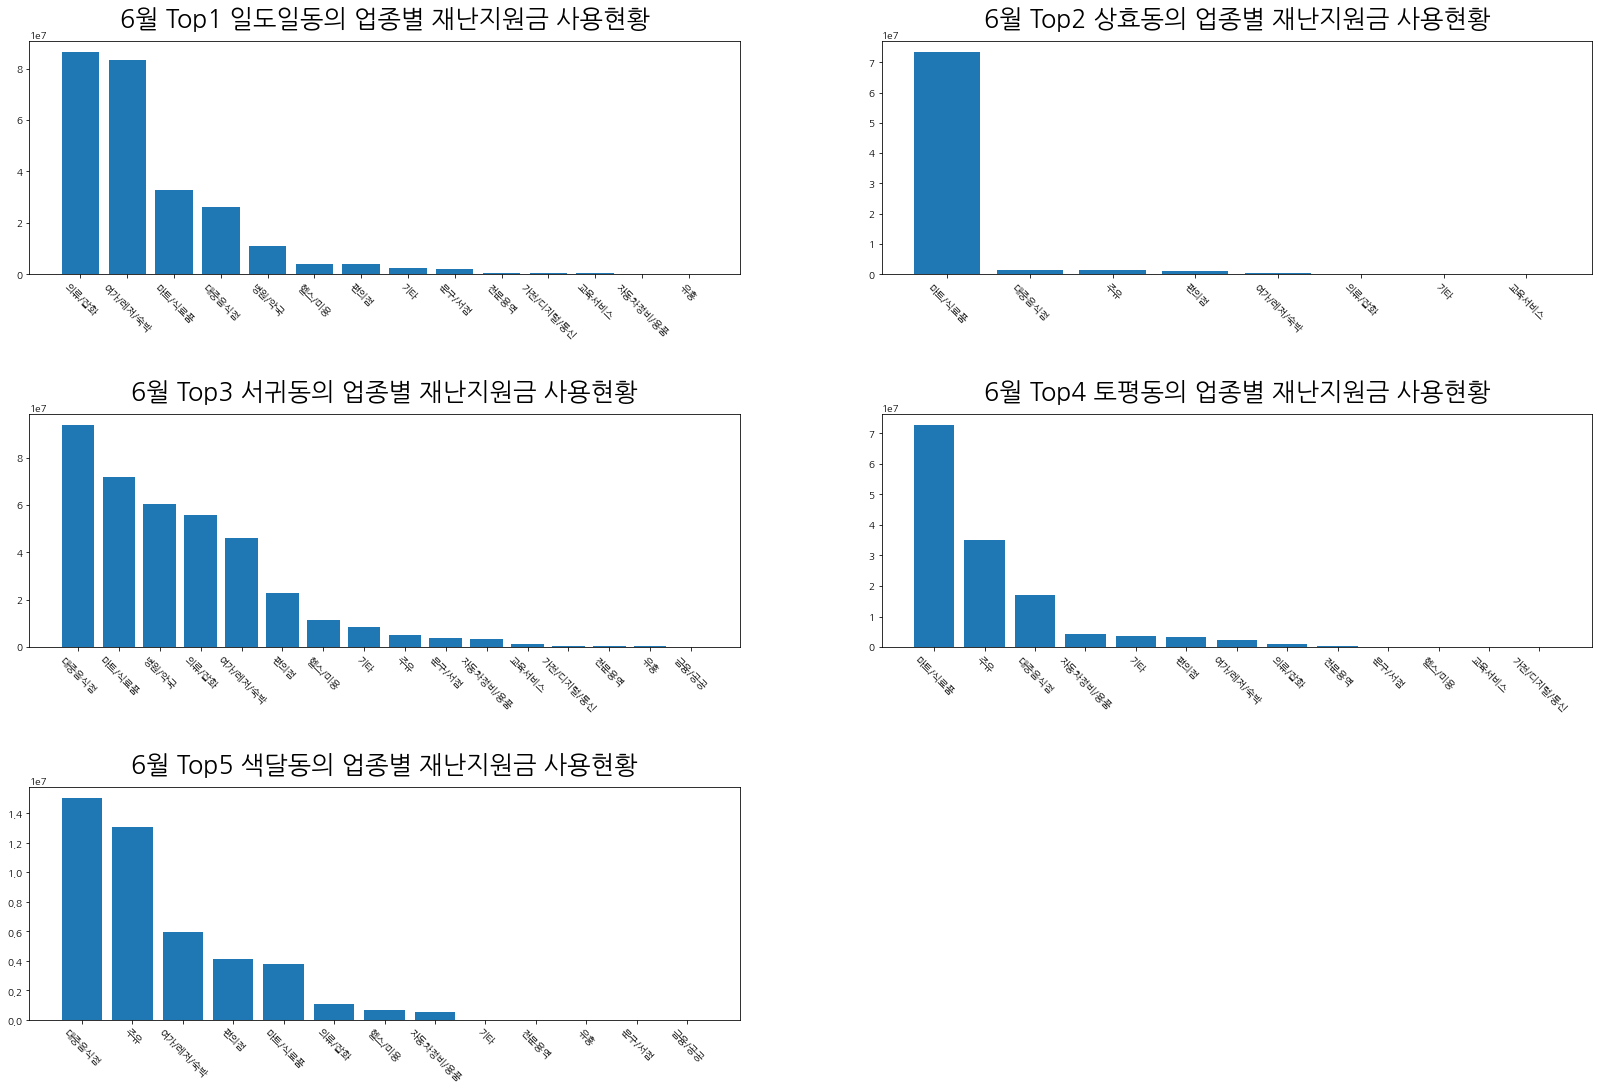

In [54]:
plt.figure(figsize = (28, 18))
df = df_comb_address6['dis_per_pop'].reset_index().sort_values(by = 'dis_per_pop', ascending = False)
for idx, address in enumerate(df['읍면동']):
    if idx == 5:
        break
    ax = plt.subplot(3, 2, idx + 1)
    data = df_june[df_june['읍면동'] == address].groupby('mid_Type')['DisSpent'].sum().sort_values(ascending = False).reset_index()
    plt.xticks(rotation = - 45 )
    plt.subplots_adjust(hspace = .6)
    ax.bar(data['mid_Type'], data['DisSpent'])
    ax.set_title(f"6월 Top{idx +1} {address}의 업종별 재난지원금 사용현황", fontsize = 25, pad = 15)

## 실제 가게수 구하기

- 위치, 가게타입, 소상공인 종류, 시간을 key로 하여 unique한 가게의 수를 구해본다

In [55]:
df_month_comb = pd.concat([df_may[['OBJECTID', 'POINT_X', 'POINT_Y', 'Type', 'FranClass', 'Time','YM','읍면동']], df_june[['OBJECTID', 'POINT_X', 'POINT_Y', 'Type', 'FranClass', 'Time', 'YM','읍면동']], df_july[['OBJECTID', 'POINT_X', 'POINT_Y', 'Type', 'FranClass', 'Time','YM','읍면동']], df_aug[['OBJECTID', 'POINT_X', 'POINT_Y', 'Type', 'FranClass', 'Time', 'YM','읍면동']]])

In [56]:
len(df_month_comb)

1117912

In [57]:
find_dupl = df_month_comb.groupby(["POINT_X", "POINT_Y", "Type", "FranClass", "Time", "YM"])['OBJECTID'].count().sort_values(ascending = False).reset_index()

In [58]:
find_dupl = find_dupl.rename(columns = {"OBJECTID" : "count"})
find_dupl.head()

,POINT_X,POINT_Y,Type,FranClass,Time,YM,count
0,950724.0990,1.500860e+06,서양음식,영세,17시,202008,1
1,906149.7253,1.499247e+06,일반한식,영세,x시,202007,1
2,906149.7253,1.499247e+06,일반한식,영세,21시,202005,1
3,906149.7253,1.499247e+06,일반한식,영세,21시,202006,1
4,906149.7253,1.499247e+06,일반한식,영세,21시,202007,1


- 위치, 가게타입, 소상공인 종류, 시간을 기준으로 한 가게가 각각 1개이므로 이것들은 유니크한 가게를 구별하는데 key가 될 수 있음을 알 수 있다.
- 보통 가게 타입 및 소상공인종류가 같다면 같은 시간대에 운영을 할 것이다. 

In [59]:
find_dupl['YM'] = 0

#시간을 통일
find_dupl['Time'] = 1
#중복된 행을 제거 -> 남는 행의갯수 => 중복된 가게의 수
print("유니크한 마켓의 수: ", len(find_dupl.drop_duplicates(keep='first')))
df_unq_market = find_dupl.drop_duplicates(keep='first')
df_unq_market = df_unq_market.drop(['Time', 'count', 'YM'], axis = 1)

유니크한 마켓의 수:  40616


5월부터 8월까지 제공된 데이터에서 유니크한 마켓 수는 40616개임을 알 수 있다.

### 가게마다 ID부여

In [60]:
df_unq_market = df_unq_market.reset_index(drop = True).reset_index().rename(columns = {'index' : 'ID'})

In [61]:
df_unq_market.head()

,ID,POINT_X,POINT_Y,Type,FranClass
0,0,950724.0990,1.500860e+06,서양음식,영세
1,1,906149.7253,1.499247e+06,일반한식,영세
2,2,906149.7253,1.499247e+06,유흥주점,일반
3,3,906149.7253,1.499247e+06,일반한식,중소1
4,4,906149.7253,1.499247e+06,통신기기,중소2


In [62]:
df_month_comb = pd.merge(df_month_comb, df_unq_market, on = ["POINT_X", "POINT_Y", "Type", "FranClass"], how = "left")

In [63]:
df_month_comb[df_month_comb.duplicated()]

,OBJECTID,POINT_X,POINT_Y,Type,FranClass,Time,YM,읍면동,ID


중복된 행이없음을 알 수 있다

In [64]:
df_may = pd.merge(df_may, df_unq_market, on = ["POINT_X", "POINT_Y", "Type", "FranClass"], how = "left")
df_june = pd.merge(df_june, df_unq_market, on = ["POINT_X", "POINT_Y", "Type", "FranClass"], how = "left")
df_july = pd.merge(df_july, df_unq_market, on = ["POINT_X", "POINT_Y", "Type", "FranClass"], how = "left")
df_aug = pd.merge(df_aug, df_unq_market, on = ["POINT_X", "POINT_Y", "Type", "FranClass"], how = "left")

## 일도일동에 인구대비 돈이 가장 많이 쓰인 여가/레저/숙박 & 의류/잡화에 대한 분석

Text(0.5, 1.0, '읍면동별 여가/레저/숙박 가게 수')

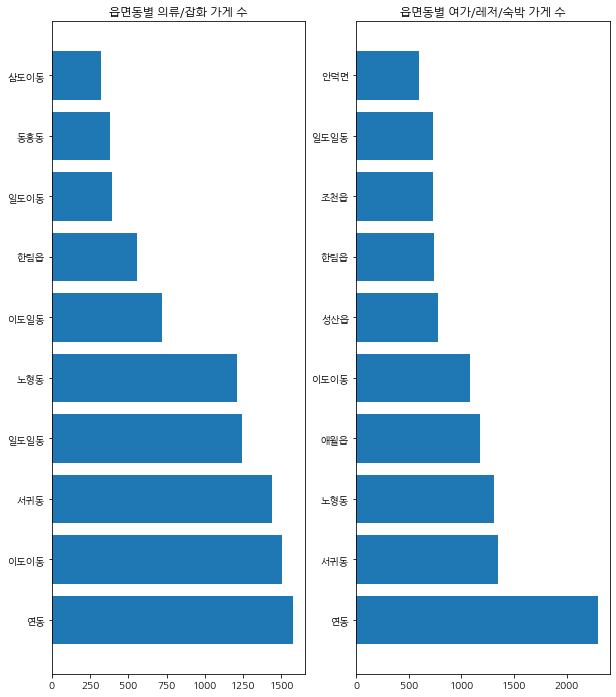

In [65]:
data = df_may[df_may['mid_Type'] == "의류/잡화"].groupby('읍면동')['ID'].count().sort_values(ascending = False).reset_index()
data = data.rename(columns = {'ID' : 'count'})
data = data.loc[: 9]
plt.figure(figsize = (10, 12))
#plt.xticks(rotation = - 90 )
ax = plt.subplot(1, 2, 1)
ax.barh(data['읍면동'], data['count'])
ax.set_title("읍면동별 의류/잡화 가게 수")

data = df_may[df_may['mid_Type'] == "여가/레저/숙박"].groupby('읍면동')['ID'].count().sort_values(ascending = False).reset_index()
data = data.rename(columns = {'ID' : 'count'})
data = data.loc[:9]
#plt.barh(data['읍면동'], data['count'])
ax = plt.subplot(1, 2, 2)
ax.barh(data['읍면동'], data['count'])
ax.set_title("읍면동별 여가/레저/숙박 가게 수")

- 일도일동에 의류관련 가게가 많은 것을 확인
- 여가관련쪽은 일도일동이 가게수가 다른 곳보다 많은 것은 아님

In [66]:
df_may[(df_may['mid_Type'] == "의류/잡화")].groupby('Type')['DisSpent'].sum().sort_values(ascending = False).reset_index().head(10)

,Type,DisSpent
0,정장,491445541
1,안경,295049749
2,스포츠의류,240963690
3,일반가구,191557836
4,기타잡화,185148850
5,아동의류,79228990
6,침구수예점,70124850
7,신발,57378094
8,내의판매점,55575320
9,주방용구,27816713


의류/잡화에 대한 재난지원금 소비는 정장 안경 스포츠의류 일반가구 기타잡화 순으로 사용됨

In [67]:
df_may[(df_may['mid_Type'] == "의류/잡화") & (df_may['읍면동'] == "일도일동")].groupby('Type')['DisSpent'].sum().sort_values(ascending = False).reset_index().head(10)
#df1 = df_may[(df_may['mid_Type'] == "의류/잡화") & (df_may['읍면동'] == "일도일동")].groupby('Type')['DisSpent'].sum()
#df1 = df_may[(df_may['mid_Type'] == "의류/잡화") & (df_may['읍면동'] == "일도일동")].groupby('Type')['ID'].sum()

,Type,DisSpent
0,정장,191469230
1,스포츠의류,82178910
2,내의판매점,21029350
3,아동의류,17358390
4,주방용구,8599803
5,신발,7434530
6,악세사리,5367795
7,침구수예점,4913000
8,기타잡화,4411670
9,안경,2200000


In [68]:
df1 = df_may[(df_may['Type'] == "정장")].groupby('읍면동')['DisSpent'].sum()
df2 = df_may[(df_may['Type'] == "정장")].groupby('읍면동')['TotalSpent'].sum()
df3 = df_may[(df_may['Type'] == "정장")].groupby('읍면동')['ID'].count()

df = pd.concat([df1, df2,df3], axis = 1)
df = df.rename(columns = {'ID' : '정장 가게 수'})
df['Disspent_percentage'] = df['DisSpent'] / df['DisSpent'].sum()
df['Total_percentage'] = df['TotalSpent'] / df['TotalSpent'].sum()
suit_top_5_address = df.sort_values(by = 'DisSpent', ascending = False).head(5).index
df.sort_values(by = 'DisSpent', ascending = False).head(5)

,DisSpent,TotalSpent,정장 가게 수,Disspent_percentage,Total_percentage
읍면동,,,,,
일도일동,191469230,650270590,447,0.389604,0.307613
이도이동,66825324,321891895,611,0.135977,0.152272
연동,56611050,273401890,517,0.115193,0.129334
서귀동,33173510,121421080,393,0.067502,0.057439
이도일동,27748870,109048440,194,0.056464,0.051586


- 일도일동이 정장가게수가 적지만 재난지원금이 더 많이 쓰인 것을 알 수 있다
- 그리고 일도일동이 5월 전체 정장 소비금액의 30%프로를 차지하는데 재난지원금을 이용한 소비금액을 따졌을 때 38%로 좀 더 사용된 것을 알 수 있다.

일도일동에 특정한 가게들만이 혜택을 받은것인지 아니면 대부분의 가게들이 혜택을 받은 것인지 알아볼 필요가 있다

Text(0.5, 1.0, 'Top5 읍면동에 대한 정장관련 재난지원금 소비금액 분포')

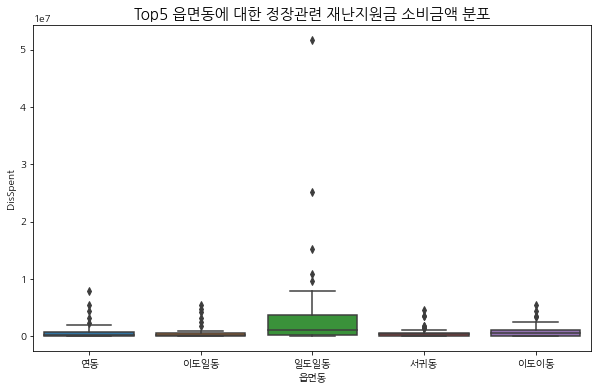

In [69]:
plt.figure(figsize = (10, 6))
df = df_may[(df_may['Type'] == "정장") & (df_may['읍면동'].isin(suit_top_5_address))].groupby(['ID', '읍면동'])['DisSpent'].sum().reset_index()
p = sns.boxplot(x = "읍면동", y = "DisSpent",data = df)
p.set_title("Top5 읍면동에 대한 정장관련 재난지원금 소비금액 분포", fontsize = 15)

일도일동의 정장 가게들이 다른 지역의 정장 가게들보다 재난지원금 소비가 대부분 많음을 알 수 있다.

In [70]:
df1 = df_may[(df_may['Type'] == "스포츠의류")].groupby('읍면동')['DisSpent'].sum()
df2 = df_may[(df_may['Type'] == "스포츠의류")].groupby('읍면동')['TotalSpent'].sum()
df3 = df_may[(df_may['Type'] == "스포츠의류")].groupby('읍면동')['ID'].count()

df = pd.concat([df1, df2,df3], axis = 1)
df = df.rename(columns = {'ID' : '스포츠 의류가게 수'})
df['Disspent_percentage'] = df['DisSpent'] / df['DisSpent'].sum()
df['Total_percentage'] = df['TotalSpent'] / df['TotalSpent'].sum()
suit_top_5_address = df.sort_values(by = 'DisSpent', ascending = False).head(5).index
df.sort_values(by = 'DisSpent', ascending = False).head(5)

,DisSpent,TotalSpent,스포츠 의류가게 수,Disspent_percentage,Total_percentage
읍면동,,,,,
일도일동,82178910,257755145,210,0.341043,0.301756
서귀동,61583280,209103880,217,0.255571,0.244800
노형동,41479260,137352370,140,0.172139,0.160800
연동,25805670,128841220,206,0.107094,0.150836
이도일동,12646310,41284600,33,0.052482,0.048332


In [71]:
df = df_may[(df_may['mid_Type'] == "여가/레저/숙박")].groupby('Type')['DisSpent'].sum().sort_values(ascending = False).reset_index()
df['Disspent_percentage'] = df['DisSpent'] / df['DisSpent'].sum()
df.head(10)

,Type,DisSpent,Disspent_percentage
0,스포츠레져용품,1035928749,0.796219
1,기타숙박업,54492605,0.041883
2,기타레져업,44239043,0.034002
3,특급호텔,26797930,0.020597
4,수영장,26748180,0.020559
5,티켓,24369422,0.018730
6,레져업소(회원제형태),13793286,0.010602
7,볼링장,13738726,0.010560
8,콘도,11918543,0.009161
9,문화취미기타,11900712,0.009147


스포츠레저용품으로 거의 80프로가 사용됨

In [72]:
df_may[(df_may['mid_Type'] == "여가/레저/숙박") & (df_may['읍면동'] == "일도일동")].groupby('Type')['DisSpent'].sum().sort_values(ascending = False).reset_index().head(10)

,Type,DisSpent
0,스포츠레져용품,435964399
1,기타숙박업,1423750
2,볼링장,1165200
3,기념품점,321000
4,레져업소(회원제형태),150000
5,2급호텔,150000
6,문화취미기타,141000
7,관광여행,46000
8,기타레져업,44000


일도일동에서의 스포츠레져용품 소비가 엄청남

In [73]:
df1 = df_may[(df_may['Type'] == "스포츠레져용품")].groupby('읍면동')['DisSpent'].sum()
df2 = df_may[(df_may['Type'] == "스포츠레져용품")].groupby('읍면동')['TotalSpent'].sum()
df3 = df_may[(df_may['Type'] == "스포츠레져용품")].groupby('읍면동')['ID'].count()

df = pd.concat([df1, df2, df3], axis = 1)
df = df.rename(columns = {'ID' : '스포츠레져용품 가게 수'})
df['Disspent_percentage'] = df['DisSpent'] / df['DisSpent'].sum()
df['Total_percentage'] = df['TotalSpent'] / df['TotalSpent'].sum()
suit_top_5_address = df.sort_values(by = 'DisSpent', ascending = False).head(5).index
df.sort_values(by = 'DisSpent', ascending = False).head(5)

,DisSpent,TotalSpent,스포츠레져용품 가게 수,Disspent_percentage,Total_percentage
읍면동,,,,,
일도일동,435964399,1388347881,567,0.420844,0.356603
서귀동,162592187,539550715,472,0.156953,0.138586
연동,143461825,610852610,566,0.138486,0.156900
노형동,36631597,157052830,230,0.035361,0.040340
이도이동,36263560,144485250,179,0.035006,0.037112


일도일동에 특정한 가게들만이 혜택을 받은것인지 아니면 대부분의 가게들이 혜택을 받은 것인지 알아볼 필요가 있다

<AxesSubplot:xlabel='읍면동', ylabel='DisSpent'>

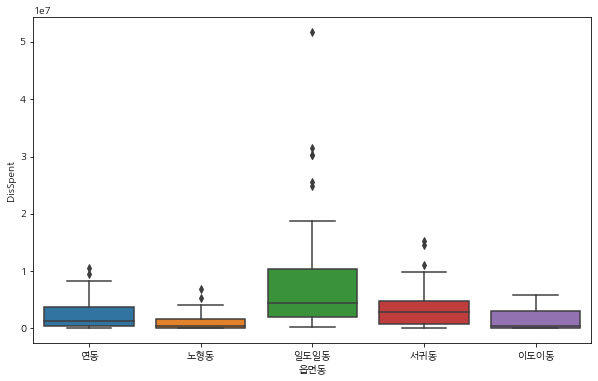

In [74]:
plt.figure(figsize = (10, 6))
df = df_may[(df_may['Type'] == "스포츠레져용품") & (df_may['읍면동'].isin(suit_top_5_address))].groupby(['ID', '읍면동'])['DisSpent'].sum().reset_index()
sns.boxplot(x = "읍면동", y = "DisSpent",data = df)

일도일동의 스포츠레져용품 가게들이 다른 지역의 스포츠레져용품 가게들보다 재난지원금 소비가 대부분 많음을 알 수 있다.

결론 : 일도일동은 제주도의 핫플레이스로 의류 및 스포츠레저 용품과 같은 가게들에 대한 소비가 많이 일어나는 곳인데, 재난지원금으로 인해 의류/잡화 쪽의 소비가 늘어난것을 위에서 확인했는데 특히 일도일동 에서 많은 혜택을 누린 것을 알 수 있었다.

## 상효동에 인구대비 돈이 가장 많이 쓰인 마트/식료품 에 대한 분석

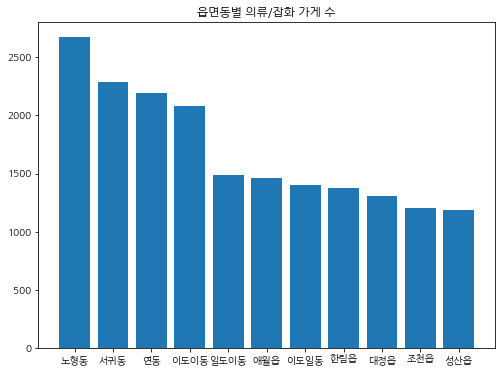

In [75]:
data = df_may[df_may['mid_Type'] == "마트/식료품"].groupby('읍면동')['ID'].count().sort_values(ascending = False).reset_index()
data = data.rename(columns = {'ID' : 'count'})
data = data.loc[: 10]
plt.figure(figsize = (18, 6))
#plt.xticks(rotation = - 90 )
ax = plt.subplot(1, 2, 1)
ax.bar(data['읍면동'], data['count'])
ax.set_title("읍면동별 의류/잡화 가게 수")
plt.show()

Top 10개안에 상효동이 들어가지는 않는다.

### 마트/식료품 분류에 5월에 가장 많이 사용된 중 TOP10 타입  

In [76]:
df_may[(df_may['mid_Type'] == "마트/식료품")].groupby('Type')['DisSpent'].sum().sort_values(ascending = False).reset_index().head(10)

,Type,DisSpent
0,슈퍼마켓,3486799832
1,농축협직영매장,1634812442
2,농협하나로클럽,884332317
3,농축수산품,474951858
4,스넥,381562313
5,정육점,349113795
6,제과점,280808355
7,대형할인점,227762533
8,기타음료식품,189835170
9,유류판매,66649528


In [77]:
df_may[(df_may['mid_Type'] == "마트/식료품") & (df_may['읍면동'] == "상효동")].groupby('Type')['DisSpent'].sum().sort_values(ascending = False).reset_index().head(10)

,Type,DisSpent
0,슈퍼마켓,186390864
1,기타건강식,354000
2,농축협직영매장,209690
3,농축수산품,131000
4,기타음료식품,127200
5,스넥,117320
6,농협하나로클럽,43180


상효동에서는 마트/식료품 분류에서 슈퍼마켓이 가장 많은 부분을 차지한다.

In [78]:
df1 = df_may[(df_may['Type'] == "슈퍼마켓")].groupby('읍면동')['DisSpent'].sum()
df2 = df_may[(df_may['Type'] == "슈퍼마켓")].groupby('읍면동')['TotalSpent'].sum()
df3 = df_may[(df_may['Type'] == "슈퍼마켓")].groupby('읍면동')['ID'].count()

df = pd.concat([df1, df2,df3], axis = 1)
df = df.rename(columns = {'ID' : '슈퍼마켓 가게 수'})
df['Disspent_percentage'] = df['DisSpent'] / df['DisSpent'].sum()
df['Total_percentage'] = df['TotalSpent'] / df['TotalSpent'].sum()
suit_top_5_address = df.sort_values(by = 'DisSpent', ascending = False).head(5).index
df.sort_values(by = 'DisSpent', ascending = False).head(5)

,DisSpent,TotalSpent,슈퍼마켓 가게 수,Disspent_percentage,Total_percentage
읍면동,,,,,
도남동,464456348,1907806870,174,0.133204,0.141580
노형동,291853134,1056741969,466,0.083702,0.078422
연동,249624677,990336749,594,0.071591,0.073494
동홍동,218436569,730715129,226,0.062647,0.054227
상효동,186390864,683341315,26,0.053456,0.050711


상효동의 슈퍼마켓 수가 적은 것에 비해 다른 동들 보다 많은 재난지원금이 사용된 것을 알 수 있다.

Text(0.5, 1.0, 'Top5의 총소비금액 사용분포')

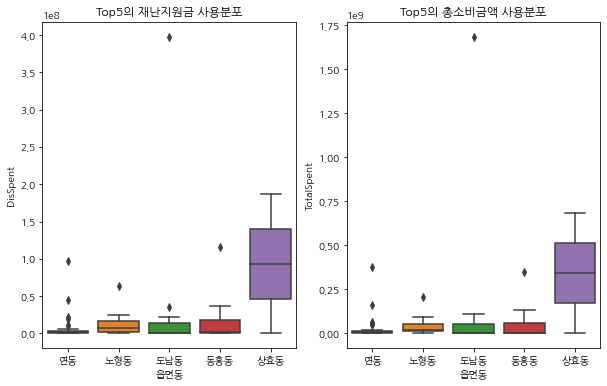

In [79]:
plt.figure(figsize = (10, 6))
ax = plt.subplot(1, 2, 1)
df = df_may[(df_may['Type'] == "슈퍼마켓") & (df_may['읍면동'].isin(suit_top_5_address))].groupby(['ID', '읍면동'])['DisSpent'].sum().reset_index()
sns.boxplot(x = "읍면동", y = "DisSpent",data = df, ax = ax)
ax.set_title('Top5의 재난지원금 사용분포')

ax = plt.subplot(1, 2, 2)
df = df_may[(df_may['Type'] == "슈퍼마켓") & (df_may['읍면동'].isin(suit_top_5_address))].groupby(['ID', '읍면동'])['TotalSpent'].sum().reset_index()
sns.boxplot(x = "읍면동", y = "TotalSpent",data = df, ax = ax)
ax.set_title('Top5의 총소비금액 사용분포')

상효동의 슈퍼마케싱 다른 동들의 슈퍼마켓보다 재난지원금 뿐만아닌 총소비가 많음을 알 수 있다.

그렇다면 서귀포시에 대형마트가 많이 없던가 상효동에 대형 마트가 많아서 그런건가 확인해보자

Text(0.5, 1.0, '서귀포 동별 대형슈퍼마켓 수')

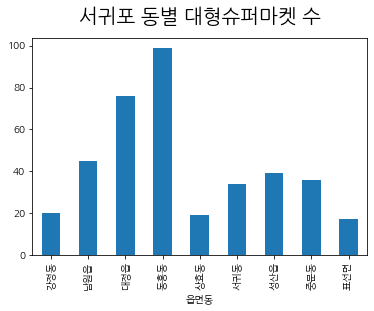

In [80]:
df_may[(df_may['SIGUNGU'] == "서귀포시") & (df_may['Type'] == "슈퍼마켓") & (df_may['FranClass'] == "일반")].groupby('읍면동')['ID'].count().plot.bar()
plt.title('서귀포 동별 대형슈퍼마켓 수', fontsize = 20, pad = 15)

그렇지는 않은 것 같다. 일도일동과 마찬가지로 어떤 이유로 인하여 상효동으로 많은 사람들이 식료품을 사러 오는 것 같다.

지금까지 살펴본 결과 그 지역이 어떤 종류의 가게가 발달 했는지 알기 위해서는 인구대비 총소비량을 통해 알 수 있을 것 같다.

대략적으로 지역별로 재난지원금을 골고루 사용된다라기 보다 그 지역적 특성에 맞춘 타입의 가게에 집중되는 것을 알 수 있다.

## 결론



- 인구 대비 재난지원금 사용량을 봤을 떄 읍면동별 불균형하게 사용된 것을 확인할 수 있었음
- 국소적으로 확인한 것이지만 각 동별로 특화된 산업이 있는데, 다른 곳의 산업보다 총소비 및 재난지원금 사용정도도 많음. 오히려 재난지원금으로 더 사용되는 경우도 있었다.
- 재난 지원금으로 인해 헬스/미용, 자동차정비, 문구/서점에 대한 소비진작이 이뤄졌다 => 왜 그랬는지에 대한 근거를 찾아보면 좋을 것 같으나 그러지 못하였다.